<a href="https://colab.research.google.com/github/AnAutomationLeap/my-youtube-content/blob/main/Crypto%20Market%20Data%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**We will begin by loading the required libraries**

In [5]:
!pip install yfinance 

In [6]:
#Load the required libraries
import pandas as pd
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt



**We want to download Crypto data for Theta Network, Decentraland, The Sandbox, and Enjin Coin. We shall use their ticker symbols THETA, MANA, SAND, ENJ**



In [38]:
# list of crptocurrencies as ticker arguments

Coin1 = 'THETA-USD'
Coin2 = 'MANA-USD'
Coin3 = 'SAND-USD'
Coin4 = 'ENJ-USD'

cryptocurrencies = [Coin1, Coin2, Coin3, Coin4 ]

**We want to see the changes in the crypto market since the beginning of the Feb 2022. Thus the start date is the first of Feb 2022**

In [39]:
data = yf.download(cryptocurrencies, start='2021-02-01',end='2022-02-25')
data.head()

[*********************100%***********************]  4 of 4 completed


Adj Close                      ...     Volume                      
             ENJ-USD  MANA-USD  SAND-USD  ...   MANA-USD   SAND-USD  THETA-USD
Date                                      ...                                 
2021-02-01  0.340748  0.155565  0.082507  ...   43257815   23641803   99952998
2021-02-02  0.359027  0.167382  0.095356  ...   58884505   66802121  158077935
2021-02-03  0.363787  0.175266  0.097712  ...   92017387   44160930   89860258
2021-02-04  0.361545  0.171865  0.099797  ...   66645460  121182041   86100691
2021-02-05  0.407135  0.215042  0.141218  ...  169656468  192354663  233942734

[5 rows x 24 columns]

In [40]:
# check for missing data
data.isnull().any()

Adj Close  ENJ-USD      False
           MANA-USD     False
           SAND-USD     False
           THETA-USD    False
Close      ENJ-USD      False
           MANA-USD     False
           SAND-USD     False
           THETA-USD    False
High       ENJ-USD      False
           MANA-USD     False
           SAND-USD     False
           THETA-USD    False
Low        ENJ-USD      False
           MANA-USD     False
           SAND-USD     False
           THETA-USD    False
Open       ENJ-USD      False
           MANA-USD     False
           SAND-USD     False
           THETA-USD    False
Volume     ENJ-USD      False
           MANA-USD     False
           SAND-USD     False
           THETA-USD    False
dtype: bool

**There are no missing data in the data frame. Therefore, we can proceed with the analysis, but first, we need to know what the features in the dataset represent.**

Feature description
*   Date: date of observation 
*   Open: The opening price
*   High: Highest price
*   Low: Lowest price
*   Close: The closing price
*   Adj Close: The closing price after adjustments for splits and dividend
*   Volume: Total stocks traded


















**Exploratory Analysis**

We are interested in the adjusted closing price. Therefore, we’ll select the adjusted-close price of the cryptocurrencies.

In [41]:
adj_close=data['Adj Close']
adj_close.head()

,ENJ-USD,MANA-USD,SAND-USD,THETA-USD
Date,,,,
2021-02-01,0.340748,0.155565,0.082507,2.035982
2021-02-02,0.359027,0.167382,0.095356,2.154845
2021-02-03,0.363787,0.175266,0.097712,2.181294
2021-02-04,0.361545,0.171865,0.099797,2.124198
2021-02-05,0.407135,0.215042,0.141218,2.450005


We’ll plot the adjusted closing price. We use subplots since the cryptocurrencies are on different scales.

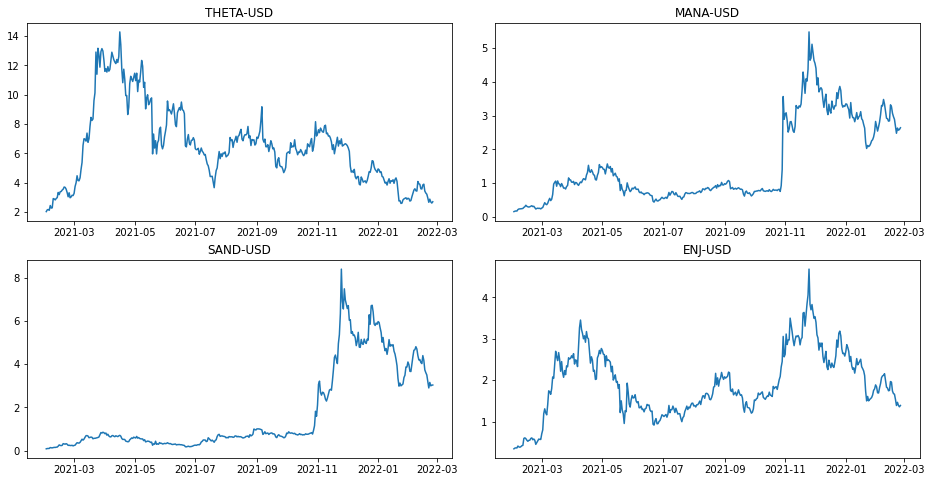

In [42]:
# ploting the adjusted closing price
fig, axs =plt.subplots(2,2,figsize=(16,8),gridspec_kw ={'hspace': 0.2, 'wspace': 0.1})
axs[0,0].plot(adj_close[Coin1])
axs[0,0].set_title(Coin1)
axs[0,1].plot(adj_close[Coin2])
axs[0,1].set_title(Coin2)
axs[1,0].plot(adj_close[Coin3])
axs[1,0].set_title(Coin3)
axs[1,1].plot(adj_close[Coin4])
axs[1,1].set_title(Coin4)
plt.show()

The plots are time series plots, indicating the change in stock price over time. Since the scales are different, we cannot compare the charts but, we’ll instead use the cumulative returns chart, which gives relative changes.

**Return Series**

A return is a change in the price of an asset over time. Returns can be positive, representing a profit, or negative, indicating a loss. Return series of an asset are easier to handle than price series and give a complete summary of the investment opportunity.

We will use the pandas pct_change() function to compute the returns.

These are relative price changes of the cryptocurrencies


In [43]:
# Returns i.e. percentage change in the adjusted close price and drop the first row with NA's
returns = adj_close.pct_change().dropna(axis=0)
#view the first 5 rows of the data frame
returns.head()

,ENJ-USD,MANA-USD,SAND-USD,THETA-USD
Date,,,,
2021-02-02,0.053644,0.075962,0.155732,0.058381
2021-02-03,0.013258,0.047102,0.024707,0.012274
2021-02-04,-0.006163,-0.019405,0.021338,-0.026175
2021-02-05,0.126098,0.251226,0.415053,0.153379
2021-02-06,-0.048338,0.084318,-0.087021,-0.070793


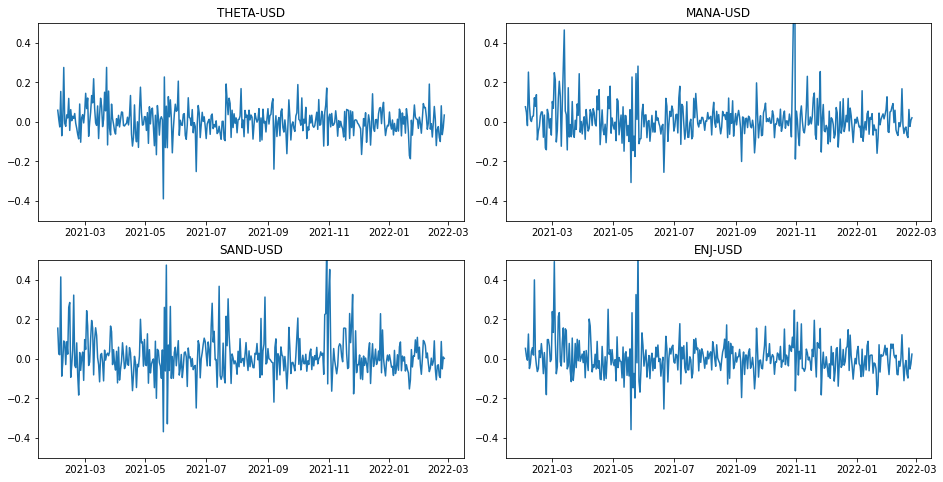

In [47]:
#ploting the returns
fig, axs = plt.subplots(2,2,figsize=(16,8),gridspec_kw ={'hspace': 0.2, 'wspace': 0.1})
axs[0,0].plot(returns[Coin1])
axs[0,0].set_title(Coin1)
axs[0,0].set_ylim([-0.5,0.5])
axs[0,1].plot(returns[Coin2])
axs[0,1].set_title(Coin2)
axs[0,1].set_ylim([-0.5,0.5])
axs[1,0].plot(returns[Coin3])
axs[1,0].set_title(Coin3)
axs[1,0].set_ylim([-0.5,0.5])
axs[1,1].plot(returns[Coin4])
axs[1,1].set_title(Coin4)
axs[1,1].set_ylim([-0.5,0.5])
plt.show()

**Volatilty**

Volatility is a measure of change in the price of an asset over time. The higher the standard deviation, the more volatile an asset is.

In [48]:
#volatility, standard deviation of the returns
returns.std()

ENJ-USD      0.090638
MANA-USD     0.118088
SAND-USD     0.106912
THETA-USD    0.074717
dtype: float64

AXIS (AXS) is the most volatile of the four assets, while Binance(BNB) is the least volatile.

**Histogram**



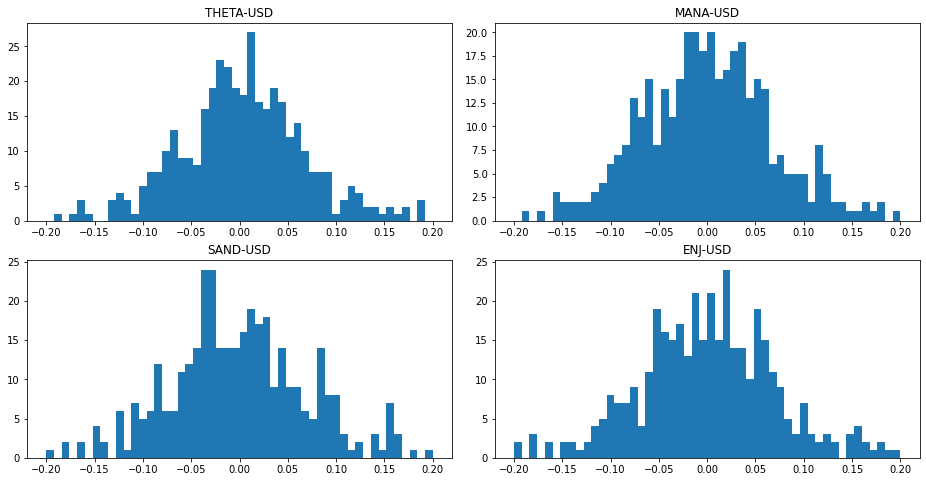

In [49]:
#ploting the histogram
fig, axs = plt.subplots(2,2,figsize=(16,8),gridspec_kw ={'hspace': 0.2, 'wspace': 0.1})
axs[0,0].hist(returns[Coin1], bins=50, range=(-0.2, 0.2))
axs[0,0].set_title(Coin1)
axs[0,1].hist(returns[Coin2], bins=50, range=(-0.2, 0.2))
axs[0,1].set_title(Coin2)
axs[1,0].hist(returns[Coin3], bins=50, range=(-0.2, 0.2))
axs[1,0].set_title(Coin3)
axs[1,1].hist(returns[Coin4], bins=50, range=(-0.2, 0.2))
axs[1,1].set_title(Coin4)
plt.show()

**Cumulative Returns**

Cumulative return express the total change in the price of an asset over time.

We use the pandas cumprod() function to calculate the daily cumulative simple returns.

In [50]:
# Cumulative return series
cum_returns = ((1 + returns).cumprod() - 1) *100
cum_returns.head()

,ENJ-USD,MANA-USD,SAND-USD,THETA-USD
Date,,,,
2021-02-02,5.364371,7.596187,15.573228,5.838122
2021-02-03,6.761296,12.664163,18.428744,7.137199
2021-02-04,6.103333,10.477941,20.955802,4.332851
2021-02-05,19.482725,38.232895,71.158820,20.335307
2021-02-06,13.707189,49.888475,56.264323,11.816462


(0.5, 1.0, 'Cumulative Returns')

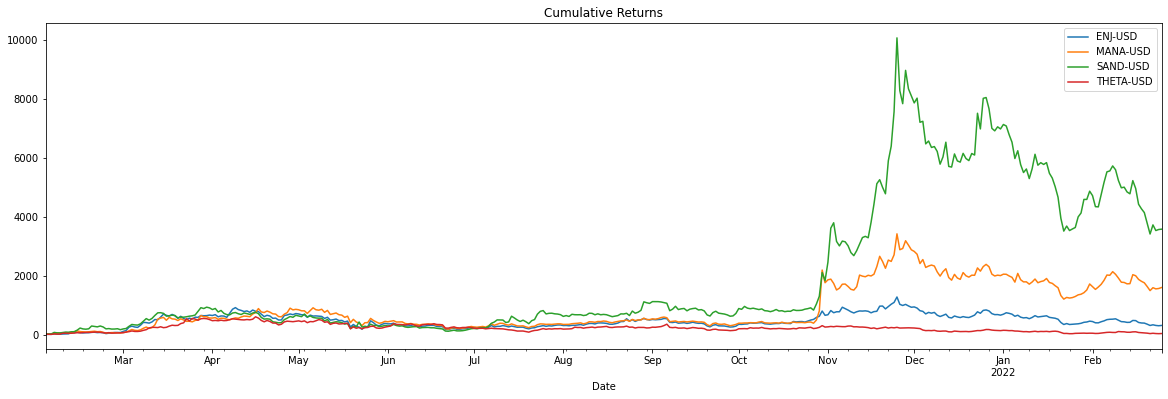

In [51]:
cum_returns.plot(figsize=(20,6))
plt.title('Cumulative Returns')
(0.5, 1.0, 'Cumulative Returns')


The Sandbox outperforms all.

**Correlation**

We’ll compute correlation on return since correlation on raw price data can give biased results. Correlation coefficients close to 1 indicate a strong positive association, -1 indicate a strong negative association and coefficients close to zero indicate no association.

In [52]:
#compute the correlations
returns.corr()

,ENJ-USD,MANA-USD,SAND-USD,THETA-USD
ENJ-USD,1.000000,0.637627,0.659362,0.598505
MANA-USD,0.637627,1.000000,0.685953,0.459668
SAND-USD,0.659362,0.685953,1.000000,0.525745
THETA-USD,0.598505,0.459668,0.525745,1.000000


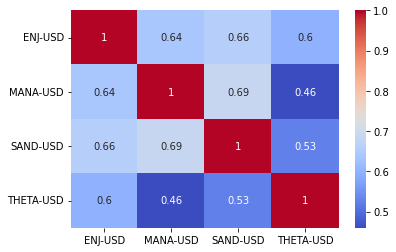

In [53]:
#plot the correlations
sns.heatmap(returns.corr(), annot=True, cmap='coolwarm')
plt.show()

From the heatmap, we can see that SAND and MANA are highly correlated. That means when SAND goes up, MANA also goes up, and when MANA falls, SAND also falls.

**Moving Average**

Moving average (rolling average) is used to smooth out short-term fluctuations to identify long-term trends or cycles. For example, a 7-day moving average reflects short-term trends in the stock market, whereas a 200-day rolling average indicates major trends in the stock market. Here we calculate the arithmetic mean of a given set of prices over a specified period.

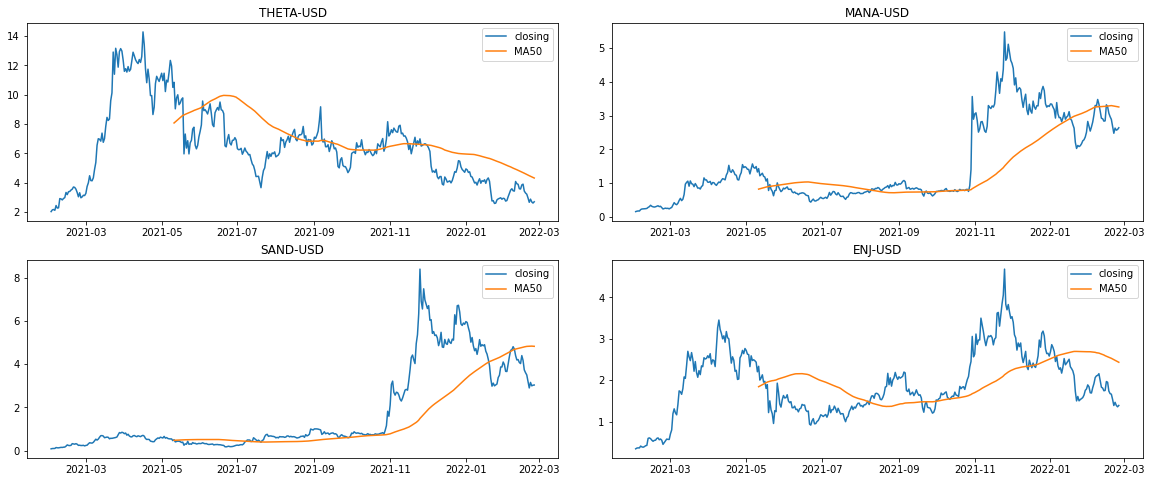

In [56]:
# compute a short-term 20-day moving average
MA20 = adj_close.rolling(20).mean()
# compute a Long-term 50-day moving average
MA50 = adj_close.rolling(100).mean()
# compute a Long-term 100-day moving average
MA100 = adj_close.rolling(100).mean()
# ploting the moving average
fig, axs = plt.subplots(2,2,figsize=(20,8),gridspec_kw ={'hspace': 0.2, 'wspace': 0.1})
axs[0,0].plot(adj_close[Coin1], label= 'closing')
axs[0,0].plot(MA50[Coin1], label= 'MA50')
axs[0,0].set_title(Coin1)
axs[0,0].legend()
axs[0,1].plot(adj_close[Coin2], label= 'closing')
axs[0,1].plot(MA50[Coin2], label= 'MA50')
axs[0,1].set_title(Coin2)
axs[0,1].legend()
axs[1,0].plot(adj_close[Coin3], label= 'closing')
axs[1,0].plot(MA50[Coin3], label= 'MA50')
axs[1,0].set_title(Coin3)
axs[1,0].legend()
axs[1,1].plot(adj_close[Coin4], label= 'closing')
axs[1,1].plot(MA50[Coin4], label= 'MA50')
axs[1,1].set_title(Coin4)
axs[1,1].legend()
plt.show()

We can observe from the chart that in mid-May of 2021, the price crosses below the 50-day MA, which indicates a downward trend, and in mid-August, the price crosses above the MA, which shows an upward trend.

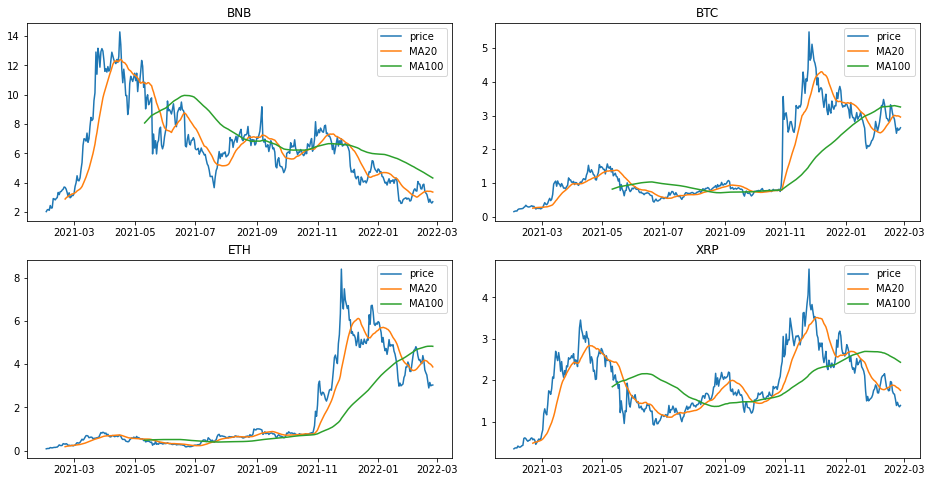

In [57]:
# ploting the moving average
fig, axs = plt.subplots(2,2,figsize=(16,8),gridspec_kw ={'hspace': 0.2, 'wspace': 0.1})
axs[0,0].plot(adj_close[Coin1], label= 'price')
axs[0,0].plot(MA20[Coin1], label= 'MA20')
axs[0,0].plot(MA100[Coin1], label= 'MA100')
axs[0,0].set_title('BNB')
axs[0,0].legend()
axs[0,1].plot(adj_close[Coin2], label= 'price')
axs[0,1].plot(MA20[Coin2], label= 'MA20')
axs[0,1].plot(MA100[Coin2], label= 'MA100')
axs[0,1].set_title('BTC')
axs[0,1].legend()
axs[1,0].plot(adj_close[Coin3], label= 'price')
axs[1,0].plot(MA20[Coin3], label= 'MA20')
axs[1,0].plot(MA100[Coin3], label= 'MA100')
axs[1,0].set_title('ETH')
axs[1,0].legend()
axs[1,1].plot(adj_close[Coin4], label= 'price')
axs[1,1].plot(MA20[Coin4], label= 'MA20')
axs[1,1].plot(MA100[Coin4], label= 'MA100')
axs[1,1].set_title('XRP')
axs[1,1].legend()
plt.show()

In [58]:
data.drop(data.index, inplace=True)

# Disclaimer! This content is for educational purposes only. And is not intended to give financial or investment advice.